In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from pmdarima import auto_arima

In [ ]:
cpih = pd.read_excel('data/cpih.xls')

display(cpih)

,period,value
0,1989-01-01,5.7
1,1989-02-01,5.8
2,1989-03-01,5.9
3,1989-04-01,5.6
4,1989-05-01,5.9
...,...,...
439,2025-08-01,4.1
440,2025-09-01,4.1
441,2025-10-01,3.8
442,2025-11-01,3.5


In [3]:
cpih10 = cpih[cpih['period'] >= '2016-01-01']
display(cpih10)

,period,value
324,2016-01-01,0.6
325,2016-02-01,0.6
326,2016-03-01,0.8
327,2016-04-01,0.7
328,2016-05-01,0.7
...,...,...
439,2025-08-01,4.1
440,2025-09-01,4.1
441,2025-10-01,3.8
442,2025-11-01,3.5


In [4]:
cpih10_model = auto_arima(cpih10['value'], seasonal=True, m=12, suppress_warnings=True)
print(cpih10_model.summary())


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  120
Model:             SARIMAX(3, 1, 2)x(0, 0, [1], 12)   Log Likelihood                 -18.237
Date:                              Tue, 27 Jan 2026   AIC                             50.474
Time:                                      22:38:50   BIC                             69.928
Sample:                                           0   HQIC                            58.374
                                              - 120                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8126      0.088     20.710      0.000       1.641       1.984
ar.L2         -0.85

In [5]:
cpih10_forecast = cpih10_model.predict(n_periods=12)
display(cpih10_forecast)

444    3.286787
445    3.264610
446    3.257515
447    2.963613
448    2.872182
449    2.741326
450    2.567797
451    2.536984
452    2.628676
453    2.649291
454    2.778793
455    2.627254
dtype: float64

In [6]:
# Create cpih10_total with original values and forecast
last_date = cpih10['period'].iloc[-1]
forecast_dates = pd.date_range(start=last_date, periods=13, freq='MS')[1:]  # Start from next month

# Create dataframe with forecast data
forecast_df = pd.DataFrame({
    'period': forecast_dates,
    'value': cpih10_forecast
})

# Combine original data with forecast
cpih10_total = pd.concat([cpih10, forecast_df], ignore_index=True)

display(cpih10_total)

,period,value
0,2016-01-01,0.600000
1,2016-02-01,0.600000
2,2016-03-01,0.800000
3,2016-04-01,0.700000
4,2016-05-01,0.700000
...,...,...
127,2026-08-01,2.536984
128,2026-09-01,2.628676
129,2026-10-01,2.649291
130,2026-11-01,2.778793


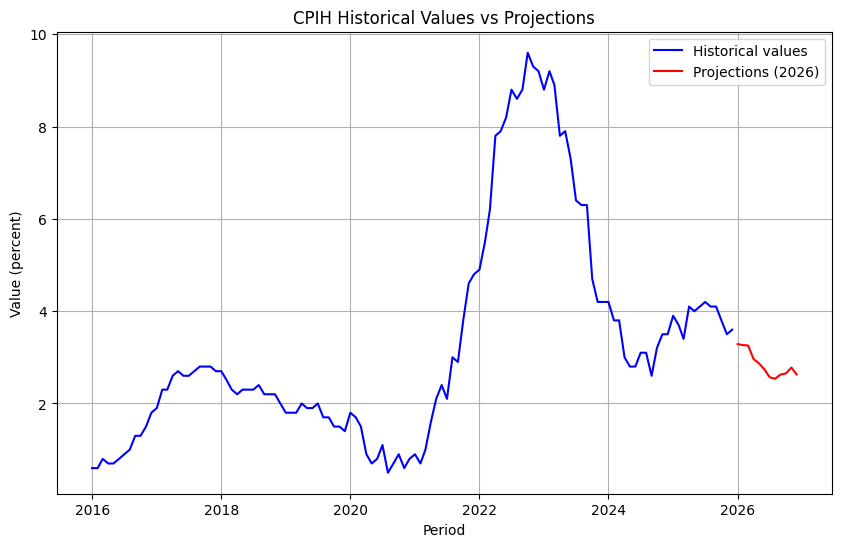

In [7]:
plt.figure(figsize=(10, 6))

# Split data: blue for up to 2025, red for 2026 projections
historical_data = cpih10_total[cpih10_total['period'] <= '2025-12-31']
projection_data = cpih10_total[cpih10_total['period'] > '2025-12-31']

plt.plot(historical_data['period'], historical_data['value'], label='Historical values', color='blue')
plt.plot(projection_data['period'], projection_data['value'], label='Projections (2026)', color='red')

plt.title('CPIH Historical Values vs Projections')
plt.xlabel('Period')
plt.ylabel('Value (percent)')
plt.legend()
plt.grid(True)

plt.savefig('img/cpih10.png', dpi=300)
plt.show()